## Springboard Data Science Track: Capstone Two

# Bot Detection on Reddit

<i>Objective: To build a classifier that identifies Reddit users as 'bots' or 'non-bots'</i>

### 4. Modelling and Analysis
<ul>
    <li><a href='#I'>A. Import Packages and Data</a></li>
    <li><a href='#ME'>B. Model Evaluation and Analysis</a></li>
    <li><a href='#CC'>C. Conclusions, Caveats and Next Steps</a></li>

### <a id='I'>A: Import Packages and Data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import shap
shap.initjs()
import io

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.options.mode.use_inf_as_na = True
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
#Import Data
X_train = pd.read_csv('Data/X_train.csv')
X_test = pd.read_csv('Data/X_test.csv')

y_train = pd.read_csv('Data/y_train.csv')
y_test = pd.read_csv('Data/y_test.csv')

In [13]:
#Visual Check
X_train.head(2)

,Score,FlairCount,EmojiCount,CommentLength,CommentCharacters,AvgWordLength,LexCount,SentenceCount,ReadEase,SyllableCount,...,Counts_xl torpedo,Counts_year old,Counts_years ago,Counts_years old,Counts_yes yes,Counts_youtube com,Counts_youtube mirror,Counts_yugioh prices,Counts_yugioh wikia,Counts_zh reddit
0,1,0,0,25,116,4.64,25,1,71.48,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,13,61,4.69,13,2,100.58,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Import Models
gb = pickle.load(open('models/Gradient_Boosting_Model.pkl','rb'))

### <a id='ME'>B. Model Evaluation and Analysis</a>

#### i. Precision vs. Recall

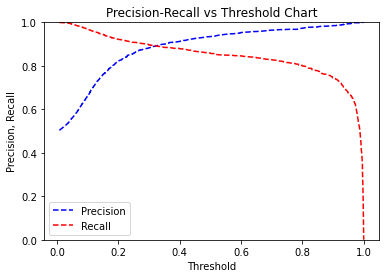

In [26]:
#Plot Precision-Recall vs Threshold
y_probs= gb.predict_proba(X_test) 

precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.savefig("Figures/pr_threshold.png")
plt.ylim([0,1])
plt.show();

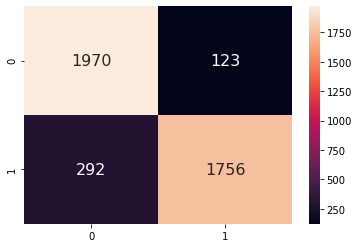

In [27]:
#Plot Confusion Matrix
y_pred = gb.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix , annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.savefig("Figures/con_matrix.png")
plt.show();

In [21]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2093
           1       0.93      0.86      0.89      2048

    accuracy                           0.90      4141
   macro avg       0.90      0.90      0.90      4141
weighted avg       0.90      0.90      0.90      4141



#### ii. Feature Importance: Shapley Values

In [15]:
shap_values = shap.TreeExplainer(gb).shap_values(X_train)

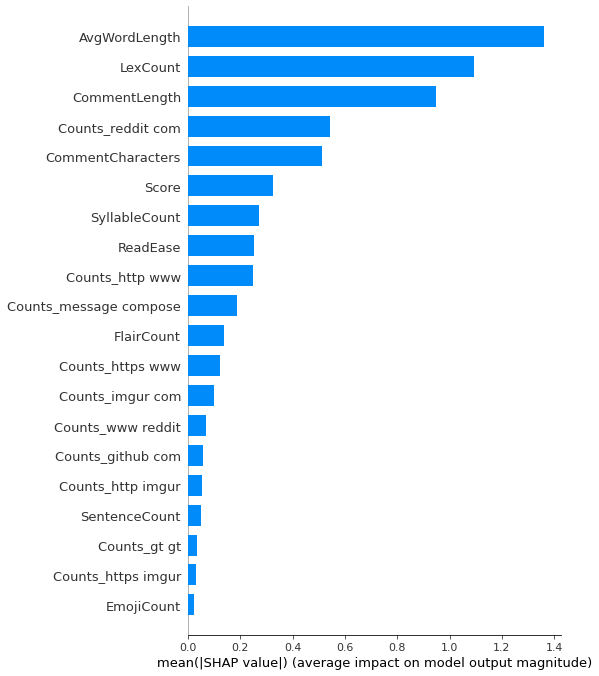

In [31]:
plt.figure(figsize=(20,10))
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("Figures/feature_importance.png")
plt.show();

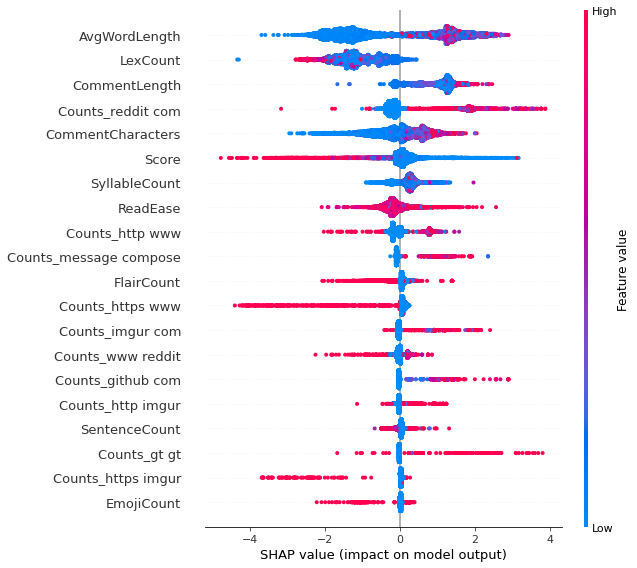

In [52]:
f = plt.figure(figsize=(20,10))
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig("Figures/feature_values.png", bbox_inches = "tight")
plt.show();

In [37]:
X_output = X_test.copy()
X_output.loc[:,'gb_predict'] = np.round(gb.predict(X_output),2)

In [38]:
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,Score,FlairCount,EmojiCount,CommentLength,CommentCharacters,AvgWordLength,LexCount,SentenceCount,ReadEase,SyllableCount,...,Counts_year old,Counts_years ago,Counts_years old,Counts_yes yes,Counts_youtube com,Counts_youtube mirror,Counts_yugioh prices,Counts_yugioh wikia,Counts_zh reddit,gb_predict
1,421,0,0,11,64,5.82,11,1,68.77,16,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
51,0,0,0,4,20,5.00,4,1,118.18,4,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
101,1,1,0,116,893,7.70,106,1,-61.50,198,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
151,1,0,0,75,377,5.03,75,5,20.73,94,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
201,1,1,0,6,33,5.50,6,1,90.77,8,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
251,1,0,0,101,600,5.94,101,1,-22.59,147,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
301,6,0,0,22,183,8.32,22,1,49.15,35,...,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0,0.0,1


In [46]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(gb)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [48]:
shap_plot(0)

In [43]:
shap_plot(1)

### <a id='CC'>C. Conclusions, Caveats and Next Steps</a>

The gradient boosting classifier was able to perform with 90% accuracy on the testing data set, providing evidence that bot comments are distinguishable from non-bots.

A few caveats:

My non-bot user group is rather small. While I attempted to use a random selection process, I may have introduced bias based on my own opinion of what 'non-bot' user comments look like. Because several of my non-bot users were well-known public figures, I believe the scores for non-bots are skewed higher than they would be for the entire population of Reddit users.
Next Steps

I would love to build a second model which works on a user-basis, rather than on a comment basis. For this model, I would take a rolling average of all features for a user's most recent posts. I believe this model will have a higher accuracy rate, as the originality of Bot posts will be, on average, much lower than for human users.